In [1]:
from transformers import pipeline

classifier = pipeline(
    "zero-shot-classification", 
    model="sjrhuschlee/flan-t5-base-mnli",
    trust_remote_code=True
)
classifier(
    "This is a test for a course about Huggingface transformer libraries",
    candidate_labels = ["education", "politics", "business"],
)

{'sequence': 'This is a test for a course about Huggingface transformer libraries',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.9785374999046326, 0.014310021884739399, 0.007152538280934095]}

In [2]:
import pandas as pd
essays_train = pd.DataFrame(pd.read_csv('/Users/aryan/Actual-Coding/CDAC/feedback-prize-english-language-learning/train.csv'))
essays = essays_train['full_text']
essays_for_testing = essays[1:26]
labels = 'cohesion','syntax','vocabulary','phraseology','grammar','conventions'

In [3]:
essays_score_real = pd.DataFrame(essays_train.iloc[1:26 , 2:8])
essays_score_real

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
1,2.5,2.5,3.0,2.0,2.0,2.5
2,3.0,3.5,3.0,3.0,3.0,2.5
3,4.5,4.5,4.5,4.5,4.0,5.0
4,2.5,3.0,3.0,3.0,2.5,2.5
5,3.5,4.0,4.0,3.5,3.5,4.0
6,3.5,4.0,3.5,3.5,4.0,4.0
7,2.5,2.5,2.5,2.5,2.5,2.0
8,3.0,3.0,3.5,3.5,3.0,3.0
9,3.0,3.0,3.5,2.5,3.0,2.5
10,3.0,3.5,3.5,3.5,3.5,3.0


In [4]:
essays_for_testing.head()

1    When a problem is a change you have to let it ...
2    Dear, Principal\n\nIf u change the school poli...
3    The best time in life is when you become yours...
4    Small act of kindness can impact in other peop...
5    Dear Principal,\r\n\r\nOur school should have ...
Name: full_text, dtype: object

In [5]:
from transformers import pipeline
classifier = pipeline(
    "zero-shot-classification", 
    model="sjrhuschlee/flan-t5-base-mnli",
    trust_remote_code=True
)

result1 = []
result1 = classifier(
    "I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. Taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home. The hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and you'll either not like it or you look and see a stain. Then you'll have to change. With the online classes you can wear anything and stay home and you wont need to stress about what to wear. Most students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. When u have online classes u wont need to miss lessons cause you can get everything set up and go take a shower and when u get out your ready to go. When your home your comfortable and you pay attention. It gives then an advantage to be smarter and even pass there classmates on class work. Public schools are difficult even if you try. some teacher dont know how to teach it in then way that students understand it. That causes students to fail and they may repeat the class.              ",
    candidate_labels = labels,
)

output1 = pd.DataFrame(result1) # type: ignore
output1['scores'] = round(((output1['scores'] * 3.0) + 3.0) * 10.0)
output1['scores'] = output1['scores'] / 10.0
output1['scores'] = round(output1['scores'] * 2) / 2 # type: ignore

print(output1)

                                            sequence       labels  scores
0  I think that students would benefit from learn...     cohesion     4.0
1  I think that students would benefit from learn...  conventions     3.5
2  I think that students would benefit from learn...  phraseology     3.5
3  I think that students would benefit from learn...   vocabulary     3.5
4  I think that students would benefit from learn...      grammar     3.5
5  I think that students would benefit from learn...       syntax     3.0


In [6]:
from transformers import pipeline
classifier = pipeline(
    "zero-shot-classification", 
    model="sjrhuschlee/flan-t5-base-mnli",
    trust_remote_code=True
)

result_set = []
for essay in essays_for_testing:
    result = classifier(
        essay,
        candidate_labels = labels,
    )
    result_set.append(result['scores']) # type: ignore

In [7]:
import numpy as np
output = pd.DataFrame(result_set, columns = labels)
output = round(((output * 3.0) + 3.0) * 10.0)
output = output / 10.0 # type: ignore
output = round(output * 2) / 2 # type: ignore

In [8]:
output.to_csv("essays_output.csv",index=False)

In [9]:
essays_score_pred = pd.DataFrame(pd.read_csv('/Users/aryan/Actual-Coding/CDAC/essays_output.csv'))
essays_score_pred

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,4.0,3.5,3.5,3.5,3.5,3.0
1,5.0,3.5,3.5,3.5,3.0,3.0
2,4.5,4.0,3.5,3.0,3.0,3.0
3,4.5,3.5,3.5,3.5,3.0,3.0
4,4.0,4.0,3.5,3.5,3.5,3.0
5,4.5,3.5,3.5,3.5,3.0,3.0
6,4.5,3.5,3.5,3.0,3.0,3.0
7,4.0,4.0,3.5,3.5,3.0,3.0
8,4.5,3.5,3.5,3.5,3.0,3.0
9,5.0,3.5,3.5,3.0,3.0,3.0


In [10]:
essays_score_real.astype('int').dtypes
essays_score_pred.astype('int').dtypes

cohesion       int32
syntax         int32
vocabulary     int32
phraseology    int32
grammar        int32
conventions    int32
dtype: object

In [11]:
from sklearn.metrics import r2_score
r_squared = r2_score(essays_score_real, essays_score_pred)
print("R-squared:\n", r_squared)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(essays_score_real, essays_score_pred)
print("\nMean Absolute Error:\n", mae)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(essays_score_real, essays_score_pred)
print("\nMean Squared Error:\n", mse)

import numpy as np
rmse = np.sqrt(mse)
print("\nRoot Mean Squared Error:\n", rmse)

from sklearn.metrics import median_absolute_error
medae = median_absolute_error(essays_score_real, essays_score_pred)
print("\nMedian Absolute Error:\n", medae)

import numpy as np
mape = np.mean(np.abs((essays_score_real - essays_score_pred) / essays_score_real)) * 100
print("\nMean Absolute Percentage Error:\n", mape)

R-squared:
 -0.8373705684982619

Mean Absolute Error:
 0.7266666666666667

Mean Squared Error:
 0.8966666666666666

Root Mean Squared Error:
 0.946924847422786

Median Absolute Error:
 0.6666666666666666

Mean Absolute Percentage Error:
 cohesion       45.907738
syntax         30.264550
vocabulary     17.041997
phraseology    22.642196
grammar        23.068783
conventions    18.650794
dtype: float64


c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


C:\Users\aryan\AppData\Local\Temp\ipykernel_15864\2426285097.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(essays_train[col], fit=stats.norm)
C:\Users\aryan\AppData\Local\Temp\ipykernel_15864\2426285097.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(essays_train[col], fit=stats.norm

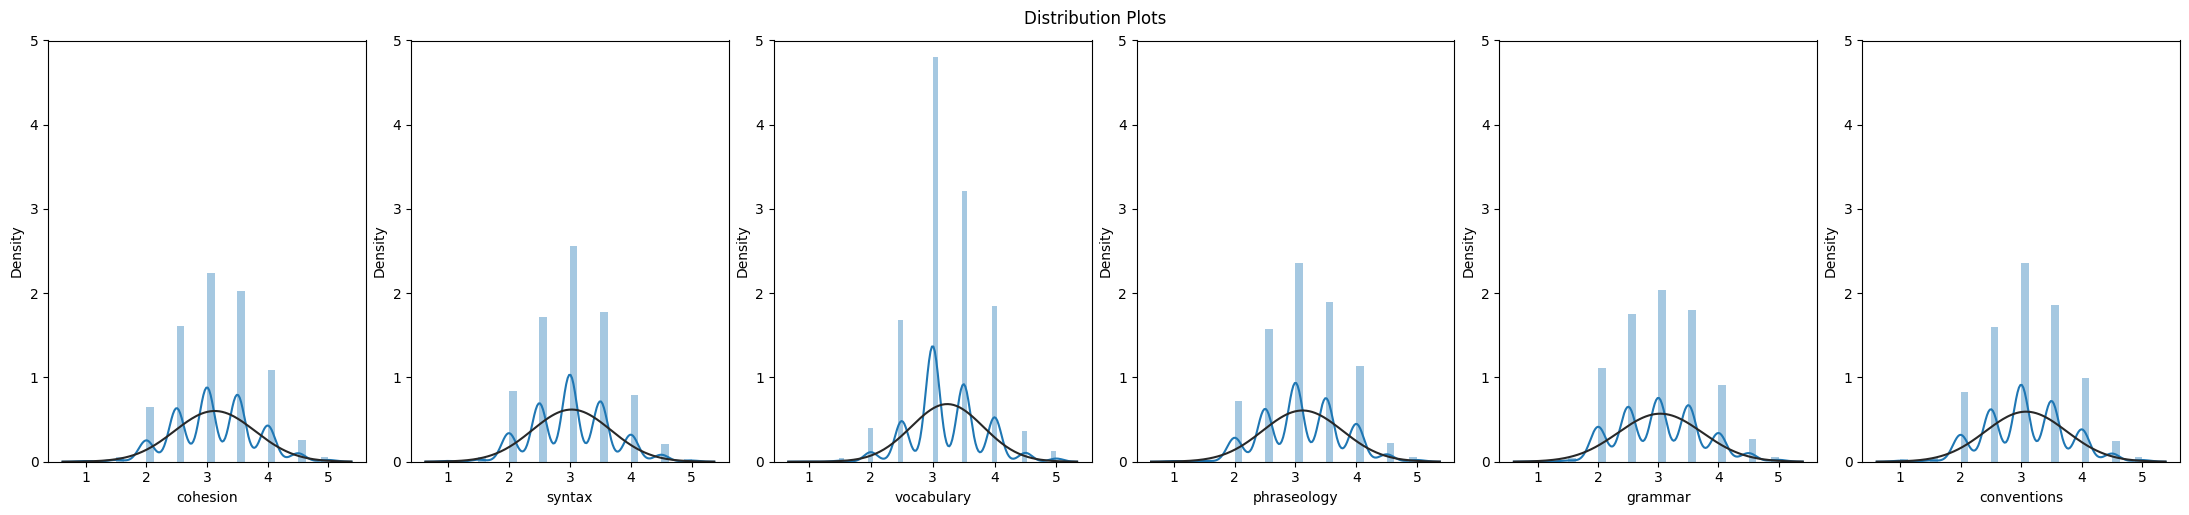

In [12]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

figure = plt.figure(figsize = (22,5))
for i, col in enumerate(essays_train.select_dtypes(['int32','float']).columns): 
    ax = plt.subplot(1, 6, i+1)
    if essays_train[col].dtype == 'int32': 
        sns.distplot(essays_train[col], fit=stats.norm, color = 'red')        
    else: 
        sns.distplot(essays_train[col], fit=stats.norm)        
    ax.set_ylim((0.0, 5.0))
figure.tight_layout(h_pad=1.0, w_pad=0.5)
plt.suptitle('Distribution Plots', y=1.02)
plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_15864\334860329.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(essays_score_pred[col], fit=stats.norm)
C:\Users\aryan\AppData\Local\Temp\ipykernel_15864\334860329.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(essays_score_pred[col], fit=st

LinAlgError: Singular matrix

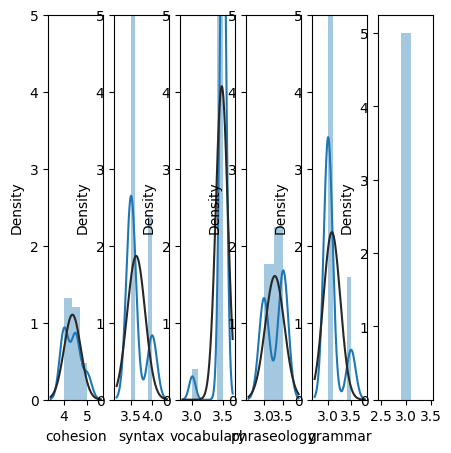

In [14]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

figure = plt.figure(figsize = (22,5))
for i, col in enumerate(essays_score_pred.select_dtypes(['int32','float']).columns): 
    ax = plt.subplot(1, 26, i+1)
    if essays_score_pred[col].dtype == 'int32': 
        sns.distplot(essays_score_pred[col], fit=stats.norm, color = 'blue')        
    else: 
        sns.distplot(essays_score_pred[col], fit=stats.norm)        
    ax.set_ylim((0.0, 5.0))
figure.tight_layout(h_pad=1.0, w_pad=0.5)
plt.suptitle('Distribution Plots', y=1.02)
plt.show()

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
import pandas as pd
import evaluate

# Prepare and tokenize dataset
essays_train = pd.DataFrame(pd.read_csv('/Users/aryan/Actual-Coding/CDAC/feedback-prize-english-language-learning/train.csv'))
essays = essays_train['full_text']
dataset = essays[1:1000]
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large")

def tokenize_function(examples):
    return tokenizer(examples, padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(200))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(200))

# Setup evaluation 
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Load pretrained model and evaluate model after each epoch
model = AutoModelForSequenceClassification.from_pretrained("sjrhuschlee/flan-t5-base-mnli", num_labels=5)
training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch")

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

In [ ]:
import tensorflow as tf
import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset

# Load your custom dataset along with label weights.
essays_train = pd.read_csv('/Users/aryan/Actual-Coding/CDAC/feedback-prize-english-language-learning/train.csv')
essays_test = pd.read_csv('/Users/aryan/Actual-Coding/CDAC/feedback-prize-english-language-learning/test.csv')

# Tokenize the text data.
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large")
encoded_inputs = tokenizer(
    pd.Series(essays_train['full_text']).tolist(),
    padding=True,
    truncation=True,
    return_tensors="pt",  # Return PyTorch tensors
    max_length=32,  # Set your desired maximum sequence length
)

# Create PyTorch datasets and data loaders.
train_input_ids = tf.constant(encoded_inputs["input_ids"])
train_attention_masks = tf.constant(encoded_inputs["attention_mask"])
train_labels = tf.constant(['cohesion','syntax','vocabulary','phraseology','grammar','conventions'])
label_weights = tf.constant(essays_train['cohesion'], essays_train['syntax'], essays_train['vocabulary'], essays_train['phraseology'], essays_train['grammar'], essays_train['conventions']) # type: ignore
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels, label_weights)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Load and configure the model.
model = AutoModelForSequenceClassification.from_pretrained("sjrhuschlee/flan-t5-base-mnli")
model.config.num_labels = 4  # Set the number of labels for your task.

# Define a custom loss function.
loss_fn = torch.nn.CrossEntropyLoss(weight=label_weights)

# Training loop.
for epoch in range(10):
    for batch in train_loader:
        input_ids, attention_mask, labels, weights = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = loss_fn(outputs.logits, labels)
        # Backpropagation and model weight updates here.

# Validation and testing code here.
